In [139]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [140]:
df = pd.read_csv(r"D:\PG-DAI\Data Analytics\Assignment 5\titanic.csv")

In [141]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [142]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Task
### Perform hypothesis test for survival, based on gender.

#### For hypothesis testing, the following are defined:

#### Null Hypothesis: There is a significant difference between  proportions of survived females to that of survived males.
#### Alternate Hypothesis:There is not a significant difference between  proportions of survived females to that of survived males.
#### The threshold value of  α  is assumed to be 0.05. Assuming Null Hypothesis is true.

In [143]:
#Total survived
sum(df.Survived)


342

In [144]:
# Percentage of people survived
sum(df.Survived)/len(df)*100

38.38383838383838

In [145]:
#Number of survivors based on gender
table = pd.crosstab(df['Survived'],df['Sex'])
table

Sex,female,male
Survived,,
0,81,468
1,233,109


In [146]:
#Proportions of survivors based on Gender
df.groupby('Sex').Survived.mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

We will be using the Two Sample Z-Test Proportion test here.



<BarContainer object of 2 artists>

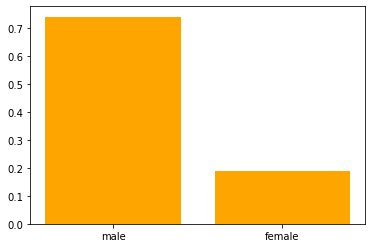

In [147]:
import matplotlib.pyplot as plt

plt.bar(df.Sex.unique(),df.groupby('Sex').Survived.mean(), color='orange')


In [148]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [149]:
# females = df[df["Sex"] == 'female']
# male = df[df["Sex"] == 'male']

In [150]:
h1_prop= df['Sex'].value_counts()['male']/len(df)

In [151]:
h0_prop= df['Sex'].value_counts()['female']/len(df)

In [152]:
sigma_prop = np.sqrt((h1_prop * (1 - h1_prop))/len(df))
sigma_prop

0.016004281240588843

In [153]:
z = (h0_prop - h1_prop)/sigma_prop
z

-18.44343756544535

In [154]:
p_val = (1-stats.norm.cdf(z))*2       # pval<alpha
p_val

2.0

In [155]:
# male["Survived"].sum()

### Since the p-value is greater than alpha, we accept the null hypothesis.